<a href="https://colab.research.google.com/github/noviantisafitri/Machine-Learning-for-Beginners/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Novianti_Safitri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [92]:
df = pd.read_csv('https://raw.githubusercontent.com/noviantisafitri/Machine-Learning-for-Beginners/refs/heads/main/Clustering.csv')
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age_Group,Cluster
0,1,1.0,19,0.078958,0.39,Healthcare,1,4,Young,2
1,2,1.0,21,0.184236,0.81,Engineer,3,3,Young,2
2,3,0.0,20,0.452694,0.06,Engineer,1,1,Young,1
3,4,0.0,23,0.310569,0.77,Lawyer,0,2,Young,3
4,5,0.0,31,0.200027,0.40,Entertainment,2,6,Middle-aged,1
...,...,...,...,...,...,...,...,...,...,...
2460,2496,1.0,45,0.483366,0.17,Entertainment,9,3,Senior,2
2461,2497,0.0,69,0.297435,0.90,Doctor,10,4,Elder,3
2462,2498,0.0,32,0.077847,0.26,Lawyer,3,2,Middle-aged,1
2463,2499,1.0,28,0.336493,0.60,Doctor,13,1,Middle-aged,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [93]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])  # Pastikan 'Cluster' adalah label yang ingin diprediksi
y = df['Cluster']

# One-Hot Encoding untuk data kategorikal
X = pd.get_dummies(X, columns=['Profession', 'Age_Group'], drop_first=True)

# Bagi data menjadi data latih dan uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi data numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Tahapan ini dimulai dengan memisahkan fitur (X) dan target (y), di mana 'Cluster' menjadi label yang akan diprediksi. Selanjutnya, dilakukan One-Hot Encoding pada fitur kategorikal seperti 'Profession' dan 'Age_Group' untuk mengonversinya menjadi bentuk numerik. Data kemudian dibagi menjadi data latih (80%) dan data uji (20%) menggunakan train_test_split(), memastikan model memiliki cukup data untuk belajar dan diuji. Terakhir, dilakukan standarisasi menggunakan StandardScaler() untuk menormalkan fitur numerik, sehingga model dapat bekerja lebih optimal dan tidak terpengaruh oleh skala yang berbeda antar fitur.

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [94]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

Tahap ini menginisialisasi beberapa algoritma klasifikasi yang akan digunakan untuk membangun model. Model yang dipilih meliputi Logistic Regression, Decision Tree, Random Forest, dan K-Nearest Neighbors (KNN) dengan jumlah tetangga (n_neighbors=5). Setiap model memiliki pendekatan yang berbeda dalam mengklasifikasikan data, sehingga nantinya dapat dibandingkan untuk menentukan performa terbaik berdasarkan metrik evaluasi.

In [95]:
# Latih dan evaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)  # Latih model
    y_pred = model.predict(X_test)  # Prediksi data uji
    accuracy = accuracy_score(y_test, y_pred)  # Hitung akurasi
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.99
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       156
           2       1.00      1.00      1.00       209
           3       0.99      0.98      0.99       128

    accuracy                           0.99       493
   macro avg       0.99      0.99      0.99       493
weighted avg       0.99      0.99      0.99       493

Decision Tree Accuracy: 0.99
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       156
           2       1.00      1.00      1.00       209
           3       0.98      0.99      0.99       128

    accuracy                           0.99       493
   macro avg       0.99      0.99      0.99       493
weighted avg       0.99      0.99      0.99       493

Random Forest Accuracy: 0.99
              precision    recall  f1-score   support

           1       0.99      0.98      0.99       156
           2       1.00      1.00   

Tahap ini melibatkan pelatihan dan evaluasi model klasifikasi menggunakan data latih dan uji. Setiap model dilatih dengan X_train dan y_train, kemudian melakukan prediksi pada X_test. Hasil prediksi dibandingkan dengan data asli (y_test) untuk menghitung akurasi dan menampilkan metrik evaluasi lainnya seperti precision, recall, dan f1-score. Hasil menunjukkan bahwa Logistic Regression, Decision Tree, dan Random Forest memiliki akurasi tinggi (99%), sedangkan KNN memiliki akurasi lebih rendah (87%).

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [96]:
# Evaluasi setiap model
for name, model in models.items():
    print(f"\nEvaluasi Model: {name}")

    # Prediksi dengan data uji
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Cetak hasil evaluasi
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")


Evaluasi Model: Logistic Regression
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-Score: 0.99

Evaluasi Model: Decision Tree
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-Score: 0.99

Evaluasi Model: Random Forest
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-Score: 0.99

Evaluasi Model: KNN
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1-Score: 0.87


Pada tahap evaluasi ini, masing-masing model diuji menggunakan data uji, dan beberapa metrik evaluasi dihitung, termasuk Accuracy, Precision, Recall, dan F1-Score. Hasil evaluasi menunjukkan bahwa Logistic Regression, Decision Tree, dan Random Forest memiliki performa yang sangat baik dengan nilai akurasi dan metrik lainnya mencapai sekitar 99%. Sebaliknya, KNN menunjukkan akurasi lebih rendah (87%) dan metrik lainnya juga lebih rendah, yang menunjukkan bahwa model berbasis pohon lebih efektif dalam kasus ini.


Confusion Matrix - Logistic Regression
[[155   0   1]
 [  0 209   0]
 [  2   0 126]]


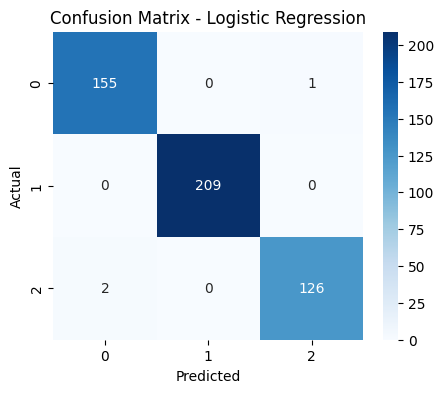


Confusion Matrix - Decision Tree
[[154   0   2]
 [  0 209   0]
 [  1   0 127]]


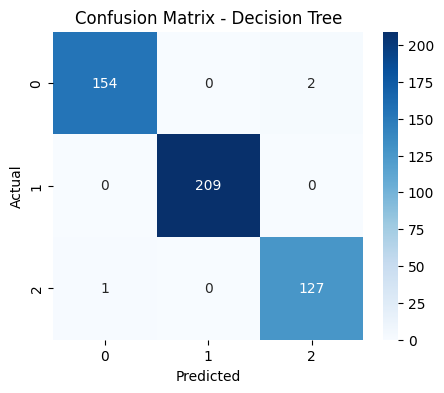


Confusion Matrix - Random Forest
[[153   0   3]
 [  0 209   0]
 [  1   0 127]]


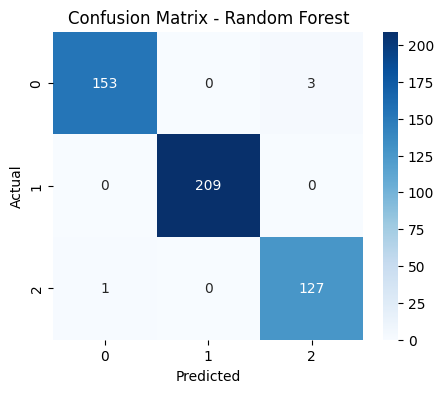


Confusion Matrix - KNN
[[129   6  21]
 [  5 199   5]
 [ 24   2 102]]


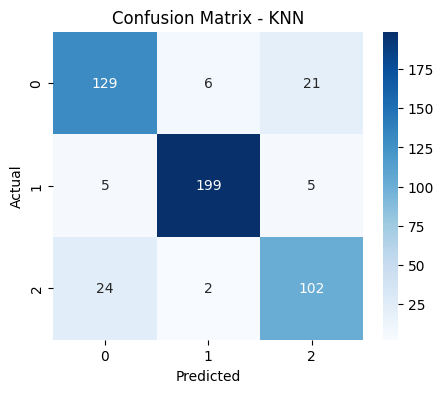

In [97]:
# Menampilkan confusion matrix untuk setiap model
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nConfusion Matrix - {name}")
    print(cm)

    # Visualisasi confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

Hasil evaluasi untuk keempat algoritma klasifikasi yang digunakan, yaitu Logistic Regression, Decision Tree, Random Forest, dan KNN, menunjukkan perbedaan dalam akurasi dan kemampuan memprediksi label dengan tepat, seperti yang terlihat pada confusion matrix dan metrik evaluasi.

1. Logistic Regression
- Accuracy: 0.99
- Precision, Recall, F1-Score: 0.99
- Confusion matrix menunjukkan bahwa model ini sangat akurat dalam memprediksi hampir semua kelas dengan sangat sedikit kesalahan. Model ini memprediksi sebagian besar data dengan benar, hanya ada sedikit kesalahan di kelas pertama (1).

2. Decision Tree:
- Accuracy: 0.99
- Precision, Recall, F1-Score: 0.99
- Confusion matrix juga menunjukkan hasil yang hampir identik dengan Logistic Regression, dengan prediksi yang sangat akurat untuk kelas pertama dan kedua, serta sedikit kesalahan pada kelas ketiga.

3. Random Forest:
- Accuracy: 0.99
- Precision, Recall, F1-Score: 0.99
- Seperti halnya Logistic Regression dan Decision Tree, Random Forest menunjukkan hasil evaluasi yang sangat baik, dengan hampir tidak ada kesalahan dalam memprediksi kelas pertama dan kedua, serta sedikit kesalahan di kelas ketiga.

4. K-Nearest Neighbors (KNN):
- Accuracy: 0.87
- Precision, Recall, F1-Score: 0.87
- KNN memiliki akurasi yang lebih rendah dibandingkan dengan tiga model lainnya, dengan kesalahan yang lebih signifikan di kelas pertama dan ketiga. Confusion matrix menunjukkan bahwa KNN cenderung membuat lebih banyak kesalahan dalam memprediksi kelas pertama dan ketiga, meskipun masih mampu memprediksi sebagian besar kelas kedua dengan baik.

## **c. Analisis Hasil Evaluasi Model Klasifikasi**

**Berdasarkan hasil evaluasi yang telah dilakukan, berikut adalah analisis untuk setiap model yang digunakan.**

1. Logistic Regression, Decision Tree, dan Random Forest:
- Ketiga model ini menunjukkan akurasi hampir 100% di seluruh metrik evaluasi (Precision, Recall, dan F1-Score), yang berarti mereka sangat efektif dalam memprediksi kelas-kelas dalam dataset ini. Hanya sedikit kesalahan yang terlihat dalam confusion matrix, terutama untuk kelas pertama.
- Precision, Recall, dan F1-Score: Semua metrik ini cukup tinggi di semua kelas, menunjukkan bahwa model tidak hanya memprediksi dengan akurat, tetapi juga mempertimbangkan keseimbangan antara True Positives, False Positives, dan False Negatives.
- Meskipun model memberikan hasil yang sangat baik pada data uji, kita perlu memeriksa kemungkinan overfitting, yaitu ketika model belajar terlalu banyak detail atau noise dari data latih dan tidak generalisasi dengan baik pada data baru. Ini dapat terjadi jika model terlalu kompleks (seperti pada Random Forest dan Decision Tree).
- Tindakan lanjutan: Cobalah untuk menilai performa model pada dataset yang lebih besar atau menggunakan teknik validasi silang (cross-validation) untuk memastikan model tidak overfit.

2. K-Nearest Neighbors (KNN):
- KNN menunjukkan akurasi lebih rendah (87%) dibandingkan ketiga model lainnya. Model ini kesulitan untuk memprediksi dengan tepat untuk kelas pertama dan ketiga, seperti yang terlihat dalam confusion matrix, di mana banyak prediksi yang salah. Ini bisa menjadi indikasi bahwa model ini kurang efisien dalam memahami pola di kelas-kelas tersebut.
- Precision, Recall, dan F1-Score: KNN memiliki Precision, Recall, dan F1-Score yang lebih rendah dibandingkan dengan model lainnya, terutama pada kelas pertama dan ketiga. Ini menunjukkan bahwa KNN lebih banyak menghasilkan False Positives dan False Negatives untuk kelas-kelas tersebut.
- KNN bisa mengalami underfitting jika pemilihan parameter (seperti jumlah tetangga) tidak optimal atau jika data yang digunakan memiliki pola yang lebih kompleks dan tidak dapat dipelajari oleh model ini.
- Tindakan lanjutan: Mencoba tuning parameter KNN (misalnya, mengubah nilai k atau menggunakan teknik normalisasi data yang lebih baik). Selain itu, jika model ini masih tidak memberikan hasil yang baik, pertimbangkan untuk mengganti KNN dengan algoritma yang lebih kompleks, seperti Random Forest atau SVM.

**Rekomendasi Tindakan Lanjutan**

1. Lakukan hyperparameter tuning untuk model yang kurang optimal seperti KNN, Decision Tree, dan Random Forest, menggunakan teknik seperti GridSearchCV atau RandomizedSearchCV untuk menemukan kombinasi parameter terbaik.
Pertimbangkan untuk menerapkan regularisasi pada model Logistic Regression untuk mencegah overfitting.
2. Gunakan cross-validation untuk memastikan model tidak overfit atau underfit dan bekerja baik pada data yang lebih bervariasi. Hal ini juga membantu mengukur akurasi model dengan lebih stabil dan lebih.